In [1]:
import numpy as np
from numpy import ndarray
from typing import Callable,List
from numpy import poly1d as pld



## Relu

In [35]:


def leaky_relu(x: ndarray)->ndarray:

    '''Apply "leaky_relu" function to each element in array'''

    return np.maximum(0.2*x,x)

In [36]:
def simple_fun(x: ndarray)->ndarray:

    '''Apply "simple_fun" function to each element in array'''

    return x**2

In [67]:

def sigmoid(x: ndarray)->ndarray:
    '''sigmoid value return'''
    return 1/(1+np.e**(-x))

## Derivaties

In [68]:
from sympy import *
import numpy as np

def fun_derive(func,value:ndarray)->ndarray:
    x = Symbol('x')
    expr = func(x)
    derivative_expr = expr.diff(x)
    f = lambdify(x, derivative_expr, 'numpy')
    derive_value=f(value)
    return derive_value


In [69]:
from typing import Callable

In [70]:
def dev(fun:Callable[[ndarray],ndarray],input_:ndarray,delta:float=0.02)->ndarray:

    '''Evaluates the derivative of a function "func" at every element in the
    input_ array.'''

    return (fun(input_+delta)-fun(input_-delta))/(2*delta)



## Nested Function

In [71]:
from typing import List

Array_Function=Callable[[ndarray],ndarray]

Chain=List[Array_Function]


def chain_lenght_2(chain: Chain,x:ndarray)->ndarray:
    '''
    Evalute of Function two chain 
    '''
    
    assert len(chain)==2 ,\
    "chain length is not equal 2"
    
    f1=chain[0]
    f2=chain[1]

    return f2(f1(x))

chain=[leaky_relu,simple_fun]
x=np.array([67,2,3])

chain_lenght_2(chain=chain,x=x)



array([1.3467e+04, 1.2000e+01, 2.7000e+01])

## derivation of chain


In [72]:
import numpy as np

def deriv_1(f: Callable, x: ndarray, eps: float = 1e-6) -> ndarray:
    '''Compute the derivative of a function using finite differences'''
    return (f(x + eps) - f(x - eps)) / (2 * eps)

In [73]:
def chain_lenght_2_deriv(chain: Chain,input_range:ndarray)->ndarray:
    '''
    Deriv of Function two chain 
    '''
    
    assert len(chain)==2 ,\
    "chain length is not equal 2"

    assert input_range.ndim == 1, \
    "Function requires a 1 dimensional ndarray as input_range"
    f1=chain[0]
    f2=chain[1]

    
    f1_of_x=f1(input_range)

    #df1/du
    f1_deriv=fun_derive(f1,input_range)

    #df2/du
    f2_deriv=fun_derive(f2,f1_of_x)

    return f1_deriv*f2_deriv

In [74]:
PLOT_RANG=np.arange(-3,3,0.01)

In [75]:
chain1=[simple_fun,sigmoid]
chain2=[sigmoid,simple_fun]


In [90]:
y0=chain_lenght_2(chain1,PLOT_RANG)
y=chain_lenght_2_deriv(chain1,PLOT_RANG)


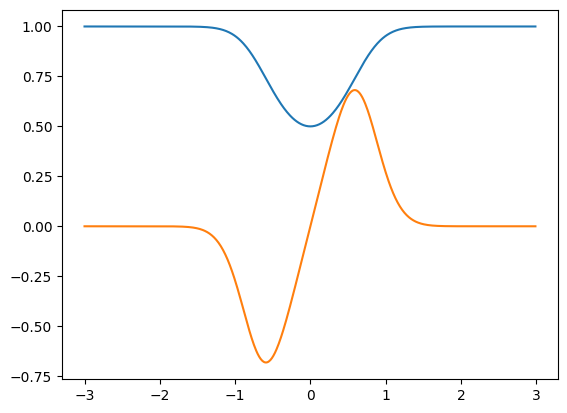

In [91]:
import matplotlib.pyplot as plt
plt.plot(PLOT_RANG,y0)
plt.plot(PLOT_RANG,y)
plt.show()

In [ ]:
import matplotlib.pyplot as plt
plt.plot(PLOT_RANG,y)

plt.show()

In [77]:

# # Example usage
# def my_function(x):
#     return x**2 + 1

# # Convert the derivative of my_function into a numpy function
# # f_derivative = function_to_numpy_derivative(my_function)

# # Evaluate the derivative function at some points
# x_values = np.array([1.0, 2.0, 3.0, 4.0, 5.0])
# derivative_values = function_to_numpy_derivative(sigmoid,value=x_values)

# print(derivative_values)


[0.19661193 0.10499359 0.04517666 0.01766271 0.00664806]
